In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Database

## Importing raw database

In [2]:
df = pd.read_csv("_data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Add new variables

In [3]:
df['Altura'] = df['Height'] * 0.0254
df['Peso'] = df['Weight'] * .453592
df['IMC'] = df['Peso'] / (df['Altura'] * df['Altura'])
df.head()

,Gender,Height,Weight,Altura,Peso,IMC
0,Male,73.847017,241.893563,1.875714,109.720985,31.185761
1,Male,68.781904,162.310473,1.747060,73.622732,24.121044
2,Male,74.110105,212.740856,1.882397,96.497550,27.232906
3,Male,71.730978,220.042470,1.821967,99.809504,30.067059
4,Male,69.881796,206.349801,1.774998,93.598619,29.708033


In [4]:
def status(imc):
    if imc < 18.5:
        return 'Magreza'
    elif imc <= 24.9:
        return 'Saudável'
    elif imc <= 29.9:
        return 'Sobrepeso'
    elif imc <= 34.9:
        return 'Obesidade G1'
    elif imc <= 39.9:
        return 'Obesidade Severa G2'
    else:
        return 'Obesidade Mórbida G3'
    

In [5]:
df['classe'] = df['IMC'].apply(status)
df.head()

,Gender,Height,Weight,Altura,Peso,IMC,classe
0,Male,73.847017,241.893563,1.875714,109.720985,31.185761,Obesidade G1
1,Male,68.781904,162.310473,1.747060,73.622732,24.121044,Saudável
2,Male,74.110105,212.740856,1.882397,96.497550,27.232906,Sobrepeso
3,Male,71.730978,220.042470,1.821967,99.809504,30.067059,Obesidade G1
4,Male,69.881796,206.349801,1.774998,93.598619,29.708033,Sobrepeso


In [6]:
df.describe()

,Height,Weight,Altura,Peso,IMC
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,1.685736,73.228054,25.475457
std,3.847528,32.108439,0.097727,14.564131,2.693810
min,54.263133,64.700127,1.378284,29.347460,15.448750
25%,63.505620,135.818051,1.613043,61.605982,23.464807
50%,66.318070,161.212928,1.684479,73.124894,25.733316
75%,69.174262,187.169525,1.757026,84.898599,27.558535
max,78.998742,269.989699,2.006568,122.465167,33.028103


## Probabilities

### Histogram

Using Pandas function

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000176C5946A58>,
      dtype=object)

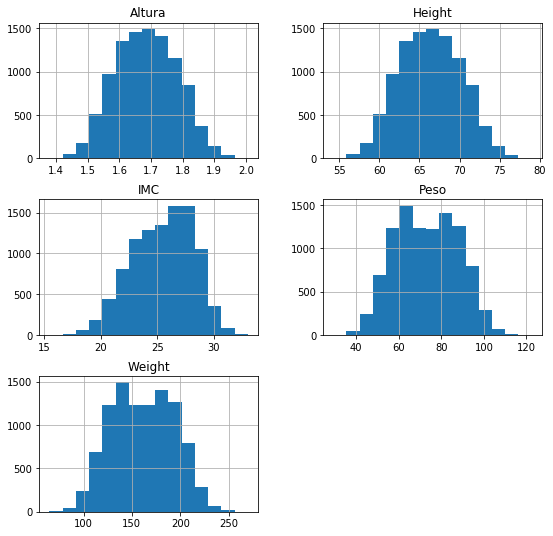

In [7]:
df.hist(bins=15,figsize=(9,9))

It is possible to set density parameter to draw a histogram of relative frequencies

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000176C594EBE0>,
      dtype=object)

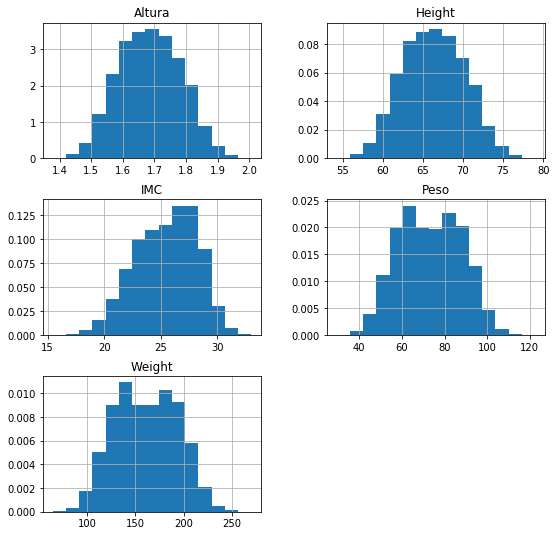

In [8]:
df.hist(bins=15,figsize=(9,9), density=True)

However, there is something wrong on 'Altura' variable, because the sum of all frequencies should be 1.0.

### Calculate your Own Frequencies

<= 1.20 :  0
<= 1.25 :  0
<= 1.30 :  0
<= 1.35 :  3
<= 1.40 :  36
<= 1.45 :  180
<= 1.50 :  607
<= 1.55 :  1266
<= 1.60 :  1681
<= 1.65 :  1761
<= 1.70 :  1714
<= 1.75 :  1411
<= 1.80 :  901
<= 1.85 :  342
<= 1.90 :  82
<= 1.95 :  15
<= 2.00 :  1
<= 2.05 :  0


<BarContainer object of 18 artists>

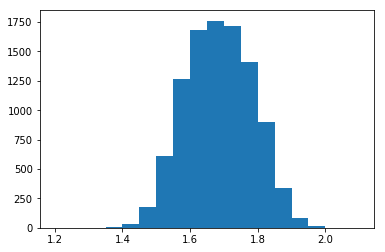

In [9]:
# define your variable
var = 'Altura'
# define your own bins
start= 1.2
stop= 2.15
step=.05
nbins=np.arange(start,stop,step)

# On Numpy, use Histogram function to count frequencies
histCounts, histBins = np.histogram(df[var], bins=nbins)

for i in range(histCounts.size):
    print('<=',"{0:.2f}".format(np.round(histBins[i],2)),': ', histCounts[i])
    
plt.bar(histBins[:-1],histCounts,align='edge',width=step)

Calculating the relative frequencies, it is the **correct form**. Do it yourself

<= 1.20 :  0.0
<= 1.25 :  0.0
<= 1.30 :  0.0
<= 1.35 :  0.0003
<= 1.40 :  0.0036
<= 1.45 :  0.018
<= 1.50 :  0.0607
<= 1.55 :  0.1266
<= 1.60 :  0.1681
<= 1.65 :  0.1761
<= 1.70 :  0.1714
<= 1.75 :  0.1411
<= 1.80 :  0.0901
<= 1.85 :  0.0342
<= 1.90 :  0.0082
<= 1.95 :  0.0015
<= 2.00 :  0.0001
<= 2.05 :  0.0


<BarContainer object of 18 artists>

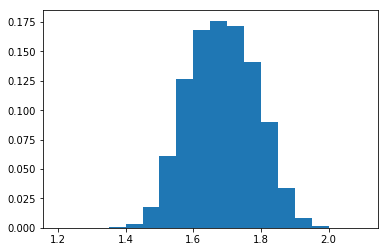

In [10]:
for i in range(histCounts.size):
    print('<=',"{0:.2f}".format(np.round(histBins[i],2)),': ', histCounts[i]/histCounts.sum())

plt.bar(histBins[:-1],histCounts/histCounts.sum(),align='edge',width=step)

Using the parameter **'density' = True**, and comparing the difference

<= 1.20 :  0.0
<= 1.25 :  0.0
<= 1.30 :  0.0
<= 1.35 :  0.005999999999999995
<= 1.40 :  0.07199999999999993
<= 1.45 :  0.3599999999999997
<= 1.50 :  1.2139999999999989
<= 1.55 :  2.531999999999998
<= 1.60 :  3.361999999999997
<= 1.65 :  3.521999999999997
<= 1.70 :  3.4279999999999973
<= 1.75 :  2.8219999999999974
<= 1.80 :  1.8019999999999985
<= 1.85 :  0.6839999999999994
<= 1.90 :  0.16399999999999987
<= 1.95 :  0.02999999999999984
<= 2.00 :  0.002000000000000007
<= 2.05 :  0.0


<BarContainer object of 18 artists>

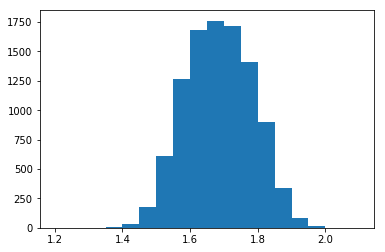

In [11]:
histCount, histBin = np.histogram(df[var], bins=nbins, density=True)
for i in range(histCount.size):
    print('<=',"{0:.2f}".format(np.round(histBin[i],2)),': ', histCount[i])
    
plt.bar(histBins[:-1],histCounts,align='edge',width=step)

### Using Matplotlib

Text(0.5, 1.0, 'Histogram')

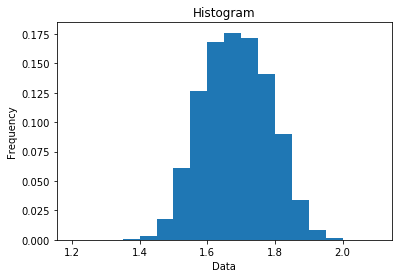

In [25]:
_, ax = plt.subplots()
ax.hist(df[var], bins=nbins, weights=(np.zeros_like(df[var]) + 1./ df[var].size))
ax.set_ylabel('Frequency')
ax.set_xlabel('Data')
ax.set_title('Histogram')

## Grouping variables

In [26]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [ ]:
df.groupby(['Peso']).first()